### Chocolura - Análise as vendas

In [25]:
import pandas as pd
vendas = pd.read_csv('data/chocolura.csv')
vendas.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [26]:
vendas.dtypes

mes       object
vendas     int64
dtype: object

In [27]:
vendas['mes'] = pd.to_datetime(vendas['mes'], format='%Y/%m/%d')
vendas.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [28]:
vendas.isna().sum().sum()
print('Quantidade de linhas e colunas', vendas.shape)
print('Quantidade de dados nulos', vendas.isna().sum().sum())

Quantidade de linhas e colunas (24, 2)
Quantidade de dados nulos 0


In [29]:
vendas['aumento'] = vendas['vendas'].diff()
vendas['aceleracao'] = vendas['aumento'].diff()
vendas.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


In [30]:
from plot_comparacao import plot_comparacao
%matplotlib inline

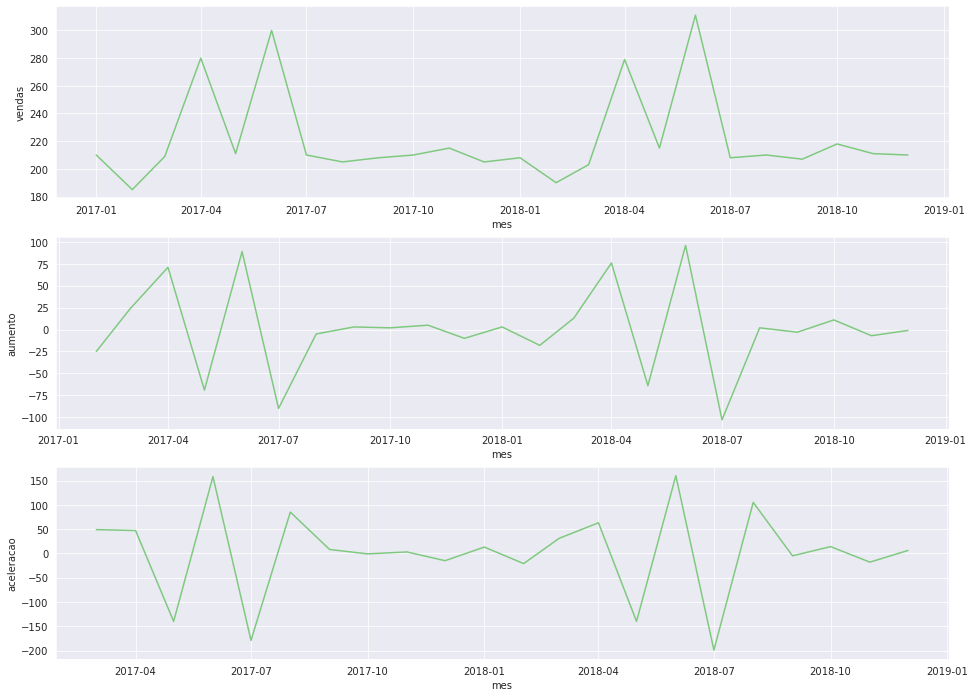

In [31]:
plot_comparacao('mes','vendas','aumento','aceleracao',vendas,'')

### Vendas por dia

In [32]:
vendas_por_dia = pd.read_csv('data/vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [33]:
print ('Quantidade de linhas e colunas:',vendas_por_dia.shape)
print ('Quantidade de dados nulos:', vendas_por_dia.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [34]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [35]:
vendas_por_dia['aumento']= vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao']= vendas_por_dia ['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


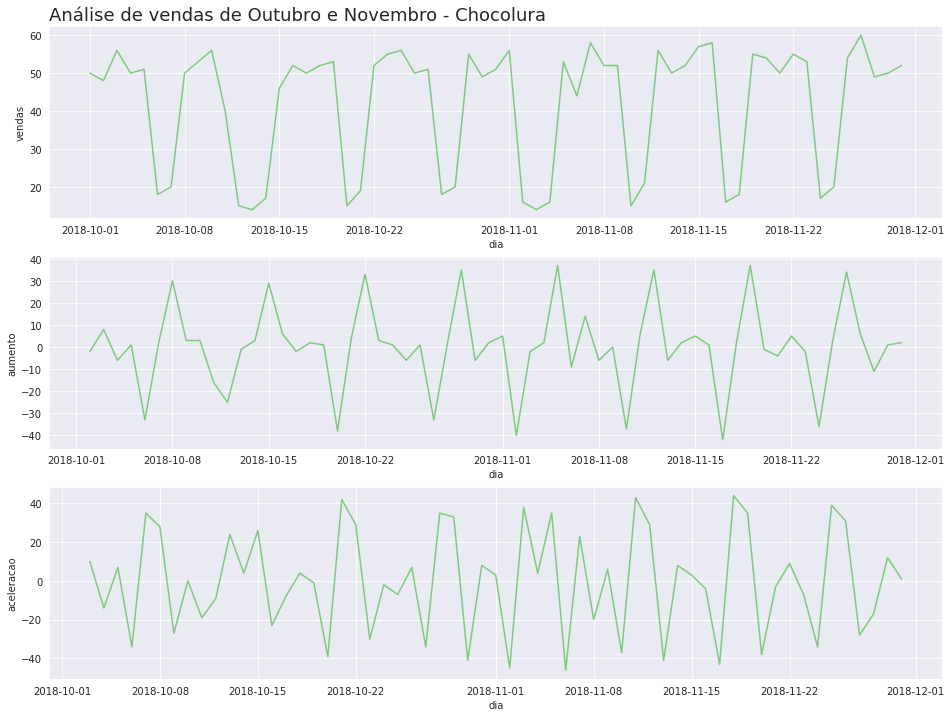

In [36]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise de vendas de Outubro e Novembro - Chocolura')

In [37]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [38]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [39]:
dias_da_semana_map = {
    'Monday':'Segunda', 'Tuesday':'Terca', 'Wednesday':'Quarta', 'Thursday':'Quinta' , 
    'Friday':'Sexta', 'Saturday':'Sabado', 'Sunday':'Domingo' 
}
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_da_semana_map)
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


In [40]:
vendas_por_dia_da_semana = vendas_por_dia.groupby(['dia_da_semana']).mean().round(0).sort_values(['vendas'])
vendas_por_dia_da_semana.head()

,vendas,aumento,aceleracao
dia_da_semana,,,
Sabado,16.0,-28.0,-20.0
Domingo,19.0,3.0,31.0
Sexta,45.0,-7.0,-5.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0


#### Autocorelação

In [41]:
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot

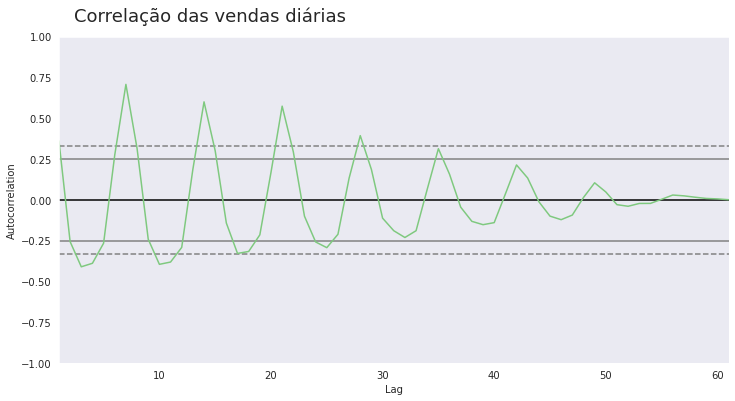

In [42]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

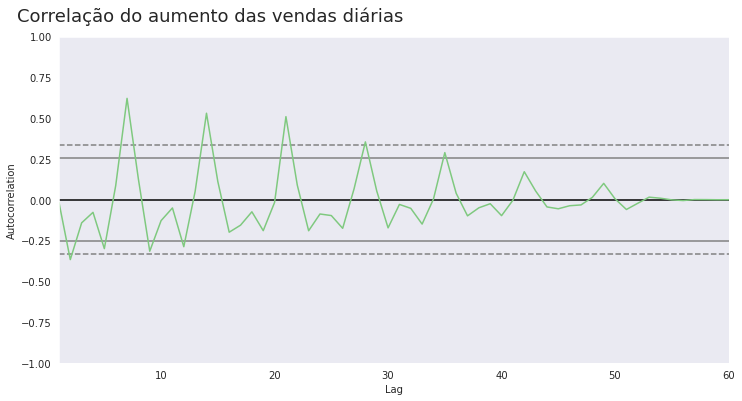

In [43]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

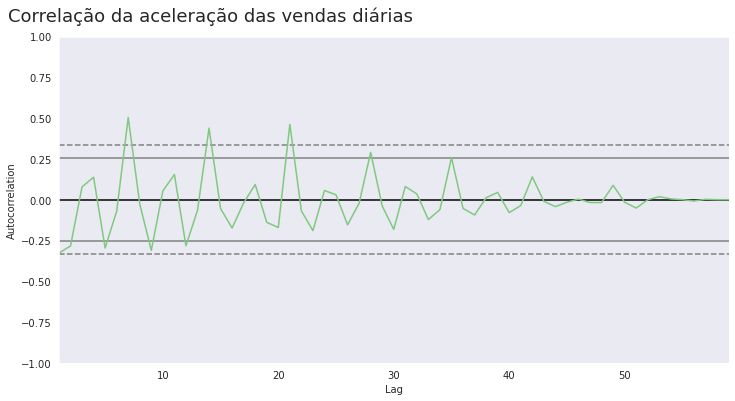

In [44]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

### Statsmodels

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose

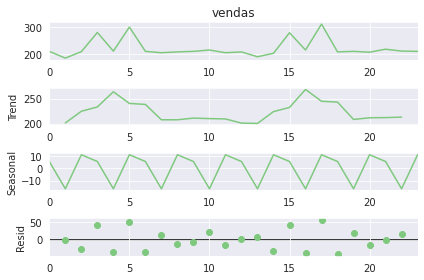

In [51]:
resultado = seasonal_decompose(vendas['vendas'],  period=3)
ax = resultado.plot()

In [52]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [53]:
data = ({
       'observacao':observacao,
       'tendencia':tendencia, 
       'sazonalidade':sazonalidade,
       'ruido':ruido
})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


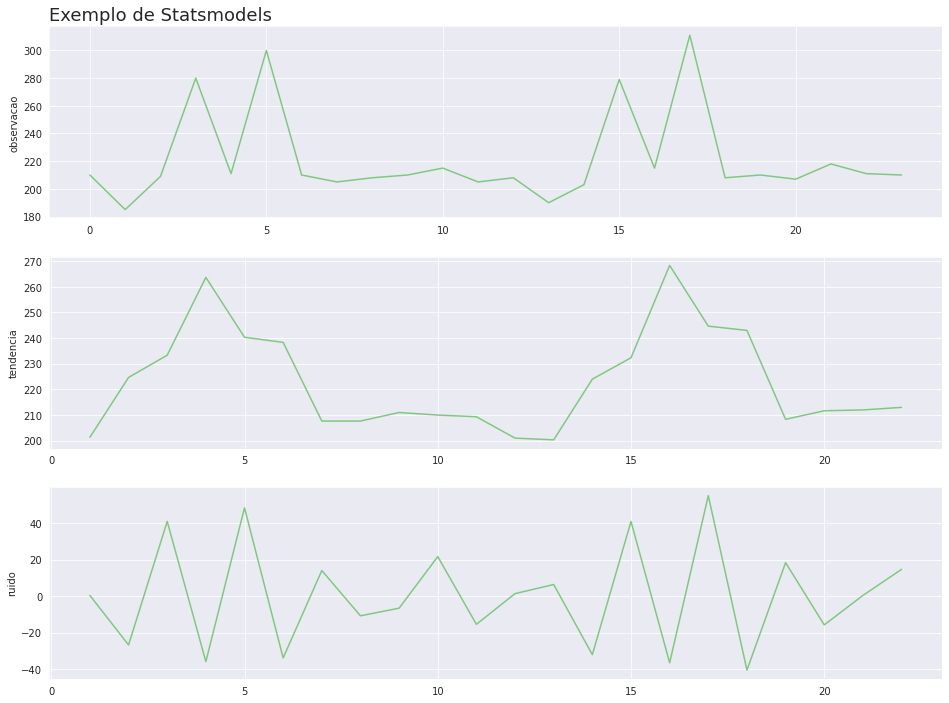

In [54]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'ruido', resultado, 'Exemplo de Statsmodels')